# Sentiment Based Product Recommendation Sytem - Capstone Project

### Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

<b>Steps to be performed</b>

1. Exploratory Data Analysis


2. Data Cleaning


3. Text Preprocessing


4. Feature Extraction


5. Training text classification model (any three from below)
 - Logistic regression
 - Random forest
 - XGBoost
 - Naive Bayes


6. Building a recommendation system (choose the best one from below)
 - User based recommendation system
 - Item based recommendation system


7. Top product recommendations


8. Web app using Flask and deploy in local system

In [295]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re, nltk, spacy, string
from nltk.corpus import stopwords 
import en_core_web_sm
nlp = en_core_web_sm.load()

import string

import warnings
warnings.filterwarnings("ignore")

In [296]:
pd.set_option('max_colwidth',500)

## 1. Exploratory Data Analysis

In [297]:
#importing the source file

ratings_df = pd.read_csv('sample30.csv')
ratings_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [298]:
#inspecting the dataframe

ratings_df.shape

(30000, 15)

In [299]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

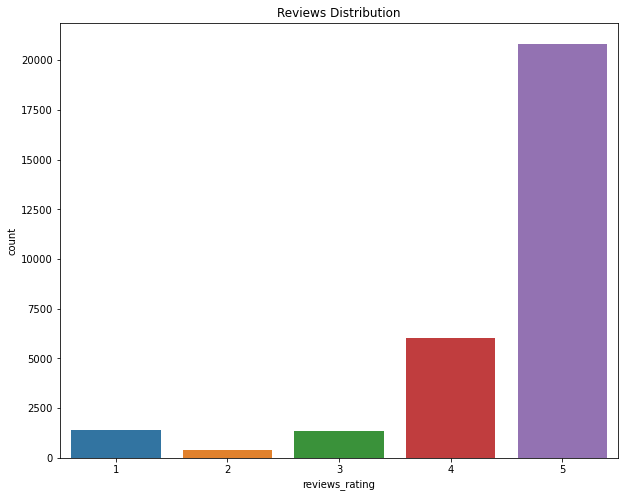

In [300]:
#Checking the counts of each ratings

plt.figure(figsize=[10,8])
sns.countplot(data=ratings_df, x='reviews_rating')
plt.title('Reviews Distribution')
plt.show()

- Users mostly rated 5 in their reviews

Positive    88.776293
Negative    11.223707
Name: user_sentiment, dtype: float64


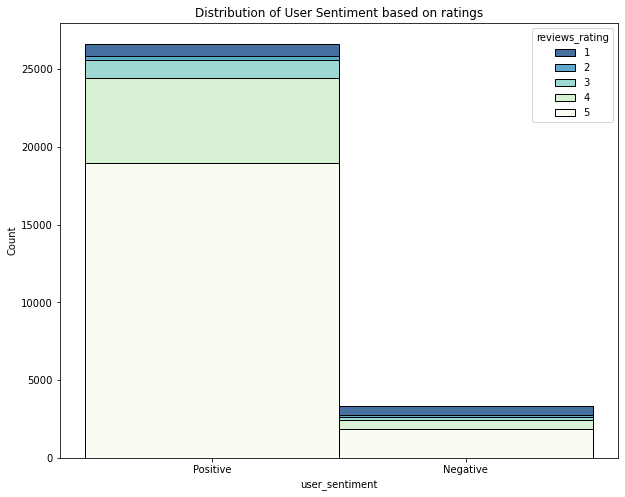

In [301]:
#checking the distribution of positive and negative reviews by the ratings
print(ratings_df.user_sentiment.value_counts(normalize=True)*100)

plt.figure(figsize=[10,8])
sns.histplot(data=ratings_df,x='user_sentiment',hue='reviews_rating',palette='GnBu_r', multiple='stack')
plt.title('Distribution of User Sentiment based on ratings')
plt.show()

- Above chart shows this is data imbalance dataset as 89% of reviews are positive. We will have to deal with class imbalance dataset.

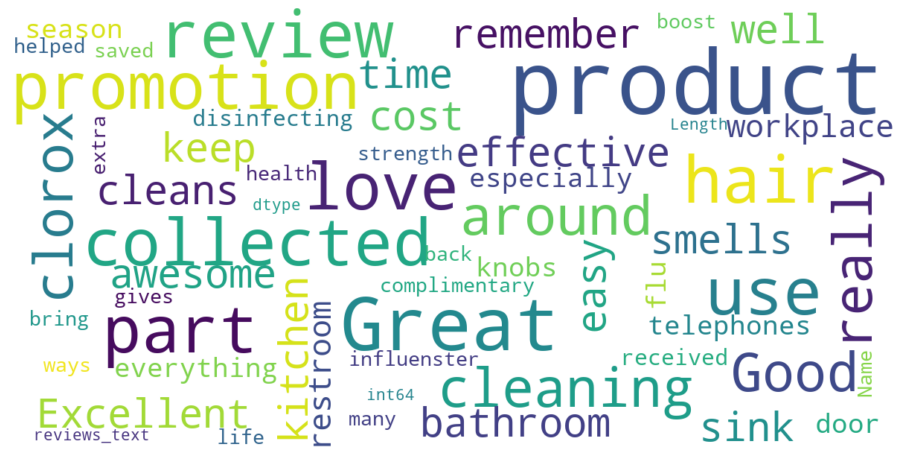

In [302]:
# Checking most word occurrence using wordcloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(str(ratings_df['reviews_text'].value_counts()))
plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- Product, Great, promotion, review are some of the words that most frequently used in the user reviews

## 2. Data Cleaning

In [303]:
#checking the null values in the dataframe

ratings_df.isnull().mean()*100

id                       0.000000
brand                    0.000000
categories               0.000000
manufacturer             0.470000
name                     0.000000
reviews_date             0.153333
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_rating           0.000000
reviews_text             0.000000
reviews_title            0.633333
reviews_userCity        93.570000
reviews_userProvince    99.433333
reviews_username         0.210000
user_sentiment           0.003333
dtype: float64

In [304]:
# Dropping the features that are missing more than 40%

ratings_df = ratings_df.drop(['reviews_userCity','reviews_userProvince','reviews_didPurchase'], axis=1)

In [305]:
#checking the missing values again

ratings_df.isnull().mean()*100

id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.470000
name                   0.000000
reviews_date           0.153333
reviews_doRecommend    8.566667
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.633333
reviews_username       0.210000
user_sentiment         0.003333
dtype: float64

In [306]:
#Imputing missing values in reviews_doRecommend feature
ratings_df['reviews_doRecommend'].fillna('No data', inplace=True)

In [307]:
#Dropping records that missing reviews_username

ratings_df = ratings_df[~ratings_df.reviews_username.isnull()]

In [308]:
#Checking the ratings and its given user sentiment

ratings_df[ratings_df.reviews_rating>=3][['reviews_text','reviews_rating','user_sentiment']]

,reviews_text,reviews_rating,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,5,Positive
1,Good flavor. This review was collected as part of a promotion.,5,Positive
2,Good flavor.,5,Positive
18,"I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! Lol",3,Positive
19,It was my first time using k-y. It didn't do anything in my opinion it felt like every time we did anything. Then again was my first time so probably did Somthing wrong.,3,Negative
...,...,...,...
29995,"I got this conditioner with Influenster to try it and im loving it so far, i have oily hair so i use it only in the ends of my hair and feels amazing, so soft and no mess!! This review was collected as part of a promotion.",5,Positive
29996,"I love it , I received this for review purposes from influenster and it leaves my hair feeling fresh and smelling great",5,Positive
29997,First of all I love the smell of this product. After you wash your hair it is so smooth and easy to brush! I did receive this product from influenster for testing purposes but all opinions ARE my own! This review was collected as part of a promotion.,5,Positive
29998,"I received this through Influenster and will never go back to anything else! I normally don't use conditioner because my hair is so oily and fine. This does not make my hair feel heavy, and it doesn't get oily during the day! It really is fantastic and plan on buying it in the future! This review was collected as part of a promotion.",5,Positive


In [309]:
#From the above it looks user sentiment is not based on the rating
#so we will update if rating >= 4 then Positive else Negative

ratings_df.user_sentiment = ratings_df.reviews_rating.apply(lambda x: 'Positive' if x>=4 else 'Negative')

In [310]:
ratings_df[['user_sentiment','reviews_rating']].head()

,user_sentiment,reviews_rating
0,Positive,5
1,Positive,5
2,Positive,5
3,Negative,1
4,Negative,1


In [311]:
#Concatnating reviews_title and reviews_text for better analysis

ratings_df.reviews_title = ratings_df.reviews_title.fillna('')
ratings_df['reviews_combined_text'] = ratings_df[['reviews_title','reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [312]:
#Converting reviews_combined_text to string

ratings_df.reviews_combined_text = ratings_df.reviews_combined_text.astype('string')

In [313]:
#check the info to check the data type of the objects
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     29937 non-null  object
 1   brand                  29937 non-null  object
 2   categories             29937 non-null  object
 3   manufacturer           29796 non-null  object
 4   name                   29937 non-null  object
 5   reviews_date           29897 non-null  object
 6   reviews_doRecommend    29937 non-null  object
 7   reviews_rating         29937 non-null  int64 
 8   reviews_text           29937 non-null  object
 9   reviews_title          29937 non-null  object
 10  reviews_username       29937 non-null  object
 11  user_sentiment         29937 non-null  object
 12  reviews_combined_text  29937 non-null  string
dtypes: int64(1), object(11), string(1)
memory usage: 3.2+ MB


## 3. Text Preprocessing

In [314]:
# importing NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

import swifter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sarav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [315]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, f1_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE

import pickle

In [316]:
#Function to clean and remove unwanted characters in the text

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]", "", text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub("\S*\d\S*", "", text)
    
    return text

In [317]:
#make a new clean dataframe

df_clean = ratings_df[['id','name','reviews_combined_text','user_sentiment']]
df_clean.head()

,id,name,reviews_combined_text,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captiva...",Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


In [318]:
#applying clean text on reviews_combined_text

df_clean["reviews_cleaned"] = df_clean.reviews_combined_text.swifter.apply(lambda x: clean_text(x))

Pandas Apply:   0%|          | 0/29937 [00:00<?, ?it/s]

In [319]:
#Function to map NLTK position tags

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [320]:
#Function to remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [321]:
#Function to lemmatize the sentences

lemmatizer = WordNetLemmatizer()

def lemma_text(text):
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopwords(text)))
    
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(words)

In [322]:
#Applying lemmatize function

df_clean['reviews_cleaned_final'] = df_clean.reviews_cleaned.swifter.apply(lambda x: lemma_text(x))

Pandas Apply:   0%|          | 0/29937 [00:00<?, ?it/s]

In [323]:
df_clean.head()

,id,name,reviews_combined_text,user_sentiment,reviews_cleaned,reviews_cleaned_final
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,Positive,good good flavor this review was collected as part of a promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,Positive,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captiva...",Negative,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation ...,disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel


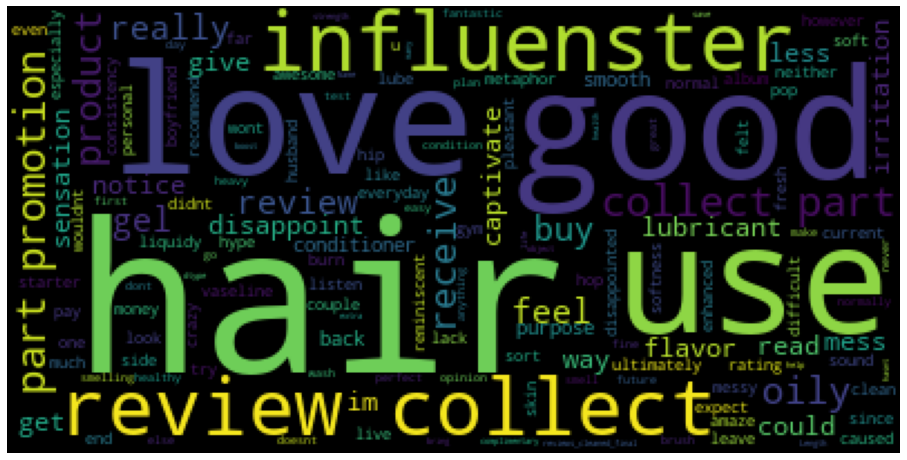

In [324]:
#Word cloud to find the top 40 words after text processing

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = stop_words, max_words=200).generate(str(df_clean.reviews_cleaned_final))

print(wordcloud)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

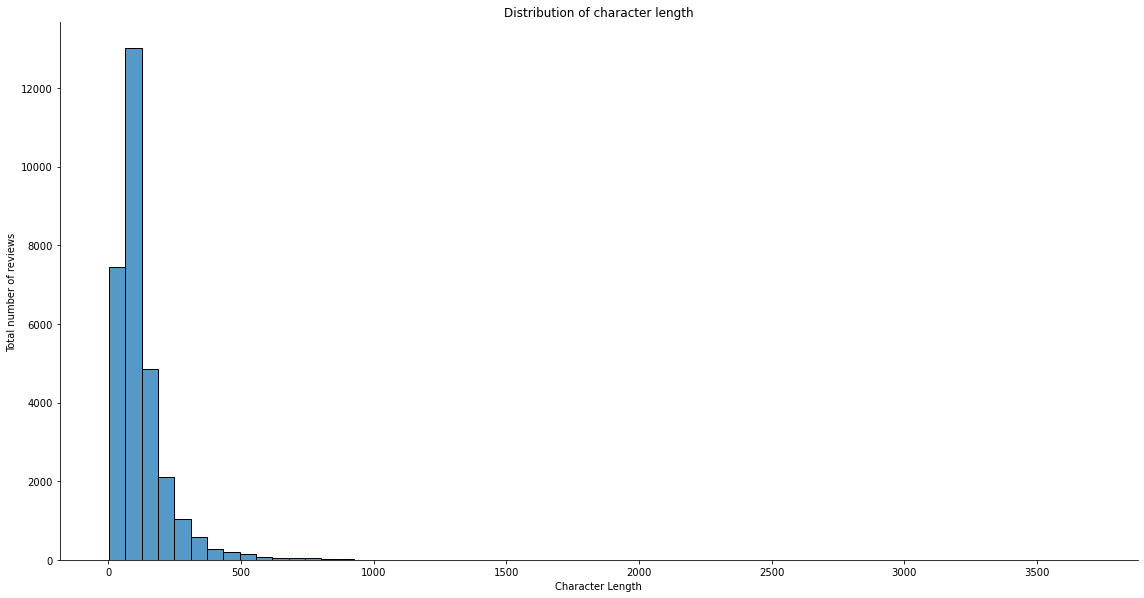

In [325]:
#Visualize the final cleaned text data

char_len = [len(each_sent) for each_sent in df_clean['reviews_cleaned_final']]

sns.displot(char_len, kind='hist', bins=60, height=8, aspect=2)
plt.xlabel('Character Length')
plt.ylabel('Total number of reviews')
plt.title('Distribution of character length')
plt.show()

In [326]:
#Function to check top n gram frequency

def get_top_ngrams(text, n=None, ngram=(1,1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
    bagofwords = vec.transform(text)
    sum_words = bagofwords.sum(axis=0)
    words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:n]

In [327]:
#Finding top10 words in unigram frequency

top_10words = get_top_ngrams(df_clean['reviews_cleaned_final'].values.astype('U'), n=10, ngram=(1,1))
df_unigram = pd.DataFrame(top_10words, columns=['unigram', 'count'])
df_unigram

,unigram,count
0,great,15024
1,use,13520
2,love,12990
3,product,12739
4,movie,10889
5,review,9482
6,promotion,8746
7,wipe,8317
8,clean,8307
9,collect,8293


In [328]:
#Finding top10 words in bigram frequency

top_10words = get_top_ngrams(df_clean['reviews_cleaned_final'].values.astype('U'), n=10, ngram=(2,2))
df_bigram = pd.DataFrame(top_10words, columns=['bigram','count'])
df_bigram

,bigram,count
0,review collect,8266
1,collect promotion,8266
2,clorox wipe,2833
3,great product,2011
4,great movie,1770
5,easy use,1576
6,love clorox,1229
7,love product,1171
8,use clorox,1099
9,good movie,1025


In [329]:
#Finding top10 words in trigram frequency

top_10words = get_top_ngrams(df_clean['reviews_cleaned_final'].values.astype('U'), n=10, ngram=(3,3))
df_trigram = pd.DataFrame(top_10words, columns=['trigram','count'])
df_trigram

,trigram,count
0,review collect promotion,8266
1,love clorox wipe,607
2,use clorox wipe,556
3,clorox disinfect wipe,549
4,review collected promotion,475
5,clean review collect,433
6,use review collect,357
7,product review collect,347
8,great product love,290
9,great movie great,269


In [330]:
#Update the negative and positive user sentiment to 0 and 1 respectively

df_clean['user_sentiment'] = df_clean['user_sentiment'].map({'Negative':0,'Positive':1})
df_clean.head()

,id,name,reviews_combined_text,user_sentiment,reviews_cleaned,reviews_cleaned_final
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,1,good good flavor this review was collected as part of a promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captiva...",0,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation ...,disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel


In [331]:
#Splitting into X and y

X = df_clean["reviews_cleaned_final"]
y = df_clean["user_sentiment"]

## 4. Feature Extraction

- TF-IDF vectorizer will be used to derive the features from the text data
- Also we use SMOTE technique to handle class imbalance

In [332]:
#using TF-IDF vectorizer using the parameters to get 800 features.

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=800, max_df=0.9, min_df=7, binary=True, 
                                   ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(df_clean['reviews_cleaned_final'])

y= df_clean['user_sentiment']

In [333]:
print(tfidf_vectorizer.get_feature_names_out())

['able' 'absolutely' 'absolutely love' 'act' 'action' 'action movie'
 'action pack' 'actor' 'actually' 'add' 'addition' 'adult' 'age' 'ago'
 'allow' 'alot' 'amaze' 'amazing' 'anymore' 'apply' 'area' 'ask'
 'available' 'away' 'awesome' 'awesome love' 'awesome movie'
 'awesome product' 'awful' 'baby' 'bad' 'bag' 'balm' 'base' 'bathroom'
 'bathroom clean' 'bathroom kitchen' 'bathroom review' 'beat' 'beautiful'
 'bee' 'begin' 'believe' 'best' 'best buy' 'best godzilla' 'best product'
 'big' 'bit' 'black' 'bleach' 'blu' 'blu ray' 'bluray' 'body' 'bottle'
 'box' 'boy' 'brand' 'break' 'bring' 'bring cocoa' 'bring old' 'brown'
 'build' 'burt' 'burt bee' 'buy' 'buy product' 'buying' 'canister' 'car'
 'care' 'carpet' 'carry' 'case' 'cast' 'cause' 'cd' 'chair' 'change'
 'character' 'cheap' 'child' 'chili' 'chip' 'choice' 'classic' 'classroom'
 'clay' 'clay mask' 'clean' 'clean bathroom' 'clean clorox'
 'clean disinfect' 'clean easy' 'clean fresh' 'clean great' 'clean house'
 'clean kitchen' 'clea

In [334]:
#Distribution of the target variable data in terms of proportions.

y.value_counts(normalize=True)*100

1    89.528009
0    10.471991
Name: user_sentiment, dtype: float64

- We can see the imbalance data and we will use SMOTE to handle this.

In [335]:
#SMOTE oversampling for imbalanced data

# splitting into test and train

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, random_state=42, test_size=0.25)

In [336]:
count = Counter(y_train)
print('Before sampling :', count)

sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)

count = Counter(y_train)
print('After sampling :', count)

Before sampling : Counter({1: 20088, 0: 2364})
After sampling : Counter({1: 20088, 0: 20088})


## 5. Training text classification model

- Logistic Regression
- Random Forest
- XGBoost
- Naive Bayes

In [337]:
performance = []

def evaluation_scores(model_name, classifier, X_test, y_test, evaluation_metrics):
    
    # Calculating Predicted value
    y_pred = classifier.predict(X_test)

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculating the values of True Positives, True Negatives, False Positivies and False Negatives
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]

    print("-"*50)
    print("Confusion Matrix:")
    print("-"*50)
    print(conf_matrix)
    print('\nTrue Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    print("-"*50)
    print('\n')

    # Calculating Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = round(accuracy,2) * 100
  
    #Calculating Sensitivity/Recall
    sensitivity_or_recall = (TP / float(TP + FN)) 
    sensitivity_or_recall = round(sensitivity_or_recall,2) * 100
  
    #Calculating Specificity
    specificity = (TN / float(TN + FP))
    specificity = round(specificity,2)  * 100
  
    #Calculating Precision
    precision = (TN / float(TN + FP))
    precision = round(precision,2) * 100
  
    #Calculating F_1 score
    F1_score = 2 * ((precision * sensitivity_or_recall) / (precision + sensitivity_or_recall))
    F1_score = round(F1_score,2)
    
    #Calculating ROC_AUC Score
    ROC = roc_auc_score(y_test, y_pred)
    ROC = round(ROC, 2) * 100
  
    print("-"*50)
    print("Evaluation Score Summary")
    print('-'*50)
    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity/Recall: {sensitivity_or_recall }') 
    print(f'Specificity: {specificity}') 
    print(f'Precision: {precision}')
    print(f'F1 Score: {F1_score}')
    print(f'ROC AUC Score: {ROC}')
    print('-'*50)

    # Returning evaluation results for comparison later
#     evaluation_metrics = []
#     evaluation_metrics.append(accuracy)
#     evaluation_metrics.append(sensitivity_or_recall)
#     evaluation_metrics.append(specificity)
#     evaluation_metrics.append(precision)
#     evaluation_metrics.append(F1_score)
    
    evaluation_metrics.append(dict({'Model_name':model_name, 'Accuracy':accuracy,'Sensitivity/Recall':sensitivity_or_recall,
                                    'Specificity':specificity, 'Precision':precision,'F1_score':F1_score,'ROC AUC Score':ROC}))
  
    return evaluation_metrics

### 5.1 Logistic Regression

In [338]:
lr = LogisticRegression().fit(X_train, y_train)

In [339]:
performance = evaluation_scores('Logistic Regression', lr, X_test, y_test, performance)

--------------------------------------------------
Confusion Matrix:
--------------------------------------------------
[[ 584  187]
 [ 679 6035]]

True Positives: 6035
True Negatives: 584
False Positives: 187
False Negatives: 679
--------------------------------------------------


--------------------------------------------------
Evaluation Score Summary
--------------------------------------------------
Accuracy: 88.0
Sensitivity/Recall: 90.0
Specificity: 76.0
Precision: 76.0
F1 Score: 82.41
ROC AUC Score: 83.0
--------------------------------------------------


In [340]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Sensitivity/Recall,Specificity,Precision,F1_score,ROC AUC Score
0,Logistic Regression,88.0,90.0,76.0,76.0,82.41,83.0


### 5.2 Hyperparameter tuning - Logistic Regression

In [341]:
lr_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01], "solver": ["liblinear"]}

In [342]:
# Setup grid hyperparameter search for LogisticRegression

lr_hpt = GridSearchCV(LogisticRegression(random_state=42),
                                param_grid=lr_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
lr_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [343]:
lr_hpt.best_params_

{'C': 100, 'solver': 'liblinear'}

In [344]:
lr_tuned_metrics = evaluation_scores('Tuned LR Model', lr_hpt, X_test, y_test, performance)

--------------------------------------------------
Confusion Matrix:
--------------------------------------------------
[[ 566  205]
 [ 671 6043]]

True Positives: 6043
True Negatives: 566
False Positives: 205
False Negatives: 671
--------------------------------------------------


--------------------------------------------------
Evaluation Score Summary
--------------------------------------------------
Accuracy: 88.0
Sensitivity/Recall: 90.0
Specificity: 73.0
Precision: 73.0
F1 Score: 80.61
ROC AUC Score: 82.0
--------------------------------------------------


In [345]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Sensitivity/Recall,Specificity,Precision,F1_score,ROC AUC Score
0,Logistic Regression,88.0,90.0,76.0,76.0,82.41,83.0
1,Tuned LR Model,88.0,90.0,73.0,73.0,80.61,82.0


- Base Logistic Regression model is performing better than tuned model

### 5.3 Random Forest

In [346]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [347]:
performance = evaluation_scores('RandomForest Classifier', rf, X_test, y_test, performance)

--------------------------------------------------
Confusion Matrix:
--------------------------------------------------
[[ 445  326]
 [ 211 6503]]

True Positives: 6503
True Negatives: 445
False Positives: 326
False Negatives: 211
--------------------------------------------------


--------------------------------------------------
Evaluation Score Summary
--------------------------------------------------
Accuracy: 93.0
Sensitivity/Recall: 97.0
Specificity: 57.99999999999999
Precision: 57.99999999999999
F1 Score: 72.59
ROC AUC Score: 77.0
--------------------------------------------------


In [348]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Sensitivity/Recall,Specificity,Precision,F1_score,ROC AUC Score
0,Logistic Regression,88.0,90.0,76.0,76.0,82.41,83.0
1,Tuned LR Model,88.0,90.0,73.0,73.0,80.61,82.0
2,RandomForest Classifier,93.0,97.0,58.0,58.0,72.59,77.0


### 5.4 Hyperparameter Tuning - Random Forest Classifier

In [349]:
# Fine tuning using Grid Search CV

rf_grid = {"n_estimators": [510],
           "max_depth": [20],
           "min_samples_split": [350, 400],
           "min_samples_leaf": [45, 50]}

In [350]:
rf_hpt = GridSearchCV(RandomForestClassifier(random_state=42),
                                param_grid=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model

rf_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [351]:
# Getting the scores of the tuned model
rf_tuned_metrics = evaluation_scores('Tune RF Model', rf_hpt, X_test, y_test, performance)

--------------------------------------------------
Confusion Matrix:
--------------------------------------------------
[[ 567  204]
 [1059 5655]]

True Positives: 5655
True Negatives: 567
False Positives: 204
False Negatives: 1059
--------------------------------------------------


--------------------------------------------------
Evaluation Score Summary
--------------------------------------------------
Accuracy: 83.0
Sensitivity/Recall: 84.0
Specificity: 74.0
Precision: 74.0
F1 Score: 78.68
ROC AUC Score: 79.0
--------------------------------------------------


In [352]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Sensitivity/Recall,Specificity,Precision,F1_score,ROC AUC Score
0,Logistic Regression,88.0,90.0,76.0,76.0,82.41,83.0
1,Tuned LR Model,88.0,90.0,73.0,73.0,80.61,82.0
2,RandomForest Classifier,93.0,97.0,58.0,58.0,72.59,77.0
3,Tune RF Model,83.0,84.0,74.0,74.0,78.68,79.0


- Tuned RandomForest classifier is performing better than base RF model.

### 5.5 XGBoost

In [353]:
import xgboost as xgb

In [354]:
xg = xgb.XGBClassifier().fit(X_train, y_train)

In [355]:
xg_metrics = evaluation_scores('XGBoost Classifier', xg, X_test, y_test, performance)

--------------------------------------------------
Confusion Matrix:
--------------------------------------------------
[[ 509  262]
 [ 421 6293]]

True Positives: 6293
True Negatives: 509
False Positives: 262
False Negatives: 421
--------------------------------------------------


--------------------------------------------------
Evaluation Score Summary
--------------------------------------------------
Accuracy: 91.0
Sensitivity/Recall: 94.0
Specificity: 66.0
Precision: 66.0
F1 Score: 77.55
ROC AUC Score: 80.0
--------------------------------------------------


In [356]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Sensitivity/Recall,Specificity,Precision,F1_score,ROC AUC Score
0,Logistic Regression,88.0,90.0,76.0,76.0,82.41,83.0
1,Tuned LR Model,88.0,90.0,73.0,73.0,80.61,82.0
2,RandomForest Classifier,93.0,97.0,58.0,58.0,72.59,77.0
3,Tune RF Model,83.0,84.0,74.0,74.0,78.68,79.0
4,XGBoost Classifier,91.0,94.0,66.0,66.0,77.55,80.0


### 5.6 Hyperparameter tunning - XGBoost

In [357]:
xg_grid = {"learning_rate": [0.45, 0.15],
           "max_depth": [5, 10]
          }

In [358]:
xg_hpt = GridSearchCV(xgb.XGBClassifier(random_state=42),
                                param_grid=xg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
xg_hpt.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.45, 0.15], 'max_depth': [5, 10]},
             scoring='f1', verbose=True)

In [359]:
xg_hpt.best_params_

{'learning_rate': 0.45, 'max_depth': 10}

In [360]:
xg_tuned_metrics = evaluation_scores('Tune XGB Model', xg_hpt, X_test, y_test, performance)

--------------------------------------------------
Confusion Matrix:
--------------------------------------------------
[[ 486  285]
 [ 287 6427]]

True Positives: 6427
True Negatives: 486
False Positives: 285
False Negatives: 287
--------------------------------------------------


--------------------------------------------------
Evaluation Score Summary
--------------------------------------------------
Accuracy: 92.0
Sensitivity/Recall: 96.0
Specificity: 63.0
Precision: 63.0
F1 Score: 76.08
ROC AUC Score: 79.0
--------------------------------------------------


In [361]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Sensitivity/Recall,Specificity,Precision,F1_score,ROC AUC Score
0,Logistic Regression,88.0,90.0,76.0,76.0,82.41,83.0
1,Tuned LR Model,88.0,90.0,73.0,73.0,80.61,82.0
2,RandomForest Classifier,93.0,97.0,58.0,58.0,72.59,77.0
3,Tune RF Model,83.0,84.0,74.0,74.0,78.68,79.0
4,XGBoost Classifier,91.0,94.0,66.0,66.0,77.55,80.0
5,Tune XGB Model,92.0,96.0,63.0,63.0,76.08,79.0


### 5.7 Naive Bayes

In [362]:
from sklearn.naive_bayes import MultinomialNB

In [363]:
mnb = MultinomialNB().fit(X_train, y_train)

In [364]:
mnb_metrics = evaluation_scores('Naive Bayes', mnb, X_test, y_test, performance)

--------------------------------------------------
Confusion Matrix:
--------------------------------------------------
[[ 647  124]
 [1270 5444]]

True Positives: 5444
True Negatives: 647
False Positives: 124
False Negatives: 1270
--------------------------------------------------


--------------------------------------------------
Evaluation Score Summary
--------------------------------------------------
Accuracy: 81.0
Sensitivity/Recall: 81.0
Specificity: 84.0
Precision: 84.0
F1 Score: 82.47
ROC AUC Score: 83.0
--------------------------------------------------


In [365]:
#Creating dataframe with all the models metrics

metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Sensitivity/Recall,Specificity,Precision,F1_score,ROC AUC Score
0,Logistic Regression,88.0,90.0,76.0,76.0,82.41,83.0
1,Tuned LR Model,88.0,90.0,73.0,73.0,80.61,82.0
2,RandomForest Classifier,93.0,97.0,58.0,58.0,72.59,77.0
3,Tune RF Model,83.0,84.0,74.0,74.0,78.68,79.0
4,XGBoost Classifier,91.0,94.0,66.0,66.0,77.55,80.0
5,Tune XGB Model,92.0,96.0,63.0,63.0,76.08,79.0
6,Naive Bayes,81.0,81.0,84.0,84.0,82.47,83.0


- Based on the above models evaluation metrics, we see <b>Naive Bayes</b> model performing well with f1_score 81.95%. Logistic Regression scores are also close to Naive Bayes.

### Saving the model

In [366]:
pickle.dump(mnb, open('pickle_file/sentiment_recommendation_naive_bayes.pkl','wb'))
pickle.dump(lr, open('pickle_file/sentiment_recommendation_logistic_regression.pkl','wb'))
pickle.dump(tfidf_vectorizer, open('pickle_file/tfidf_vectorizer.pkl','wb'))
pickle.dump(df_clean, open('pickle_file/cleaned_data.pkl','wb'))

## 6. Building Recommendation System

Bulilding below collaborative recommendation system:

- User-user based approach
- Item-item based approach

In [367]:
#Checking the original dataframe

ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     29937 non-null  object
 1   brand                  29937 non-null  object
 2   categories             29937 non-null  object
 3   manufacturer           29796 non-null  object
 4   name                   29937 non-null  object
 5   reviews_date           29897 non-null  object
 6   reviews_doRecommend    29937 non-null  object
 7   reviews_rating         29937 non-null  int64 
 8   reviews_text           29937 non-null  object
 9   reviews_title          29937 non-null  object
 10  reviews_username       29937 non-null  object
 11  user_sentiment         29937 non-null  object
 12  reviews_combined_text  29937 non-null  string
dtypes: int64(1), object(11), string(1)
memory usage: 4.2+ MB


In [368]:
#Gettings the required features in a new dataframe

recomm_df = ratings_df[['id','name','reviews_rating','reviews_username']]

In [369]:
#Checking if null present in the new df created

recomm_df.isnull().sum()

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

In [370]:
recomm_df.head()

,id,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557


### Dividing the dataset into train and test

In [371]:
#Splitting the data into train and test
train, test = train_test_split(recomm_df, test_size=0.25, random_state=42)

In [372]:
#Checking the shape of the train and test
print(train.shape)
print(test.shape)

(22452, 4)
(7485, 4)


In [373]:
#Creating pivot which the product names are as columns and usernames are in rows

df_pivot = pd.pivot_table(train, index='reviews_username', columns='id', values='reviews_rating').fillna(0)

df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train and test datasets

In [374]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [375]:
#Products that not yet rated by user marked as 1 for prediction

dummy_train['reviews_raing'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [376]:
# Convert the dummy train dataset into matrix format.

dummy_train = pd.pivot_table(dummy_train, index='reviews_username', columns='id', values='reviews_rating').fillna(1)
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User similarity matrix

In [377]:
#Using cosine similartiy

from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.

user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [378]:
user_correlation.shape

(19431, 19431)

In [379]:
#Using adjusted cosine similarity

# Create a user-product matrix. We are not removing NaN values and calculating mean only for the products rated by the user

df_pivot = pd.pivot_table(train, index='reviews_username', columns='id', values='reviews_rating')

In [380]:
df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
# Normalising the reviews rating of products for each user around 0 mean

mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [382]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
#Finding cosine similarity

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Prediction: User-User

In [384]:
#Ignoring correlation for values less than 0
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [385]:
user_correlation.shape

(19431, 19431)

In [386]:
df_pivot.shape

(19431, 260)

In [387]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 1.46399891, 1.88982237,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [388]:
user_predicted_ratings.shape

(19431, 260)

In [389]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.697789,0.0,0.0,0.0,0.269582,2.581989,1.018079,...,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.463999,1.889822,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


### Finding top 20 recommendation for the user

In [390]:
# Take the user name as input

user_input = "steve"
print('User input is:',user_input)

User input is: steve


In [391]:
#Top 20 products for the user

recomm = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recomm

id
AVpfRTh1ilAPnD_xYic2    448.822682
AVpfPaoqLJeJML435Xk9    284.909494
AVpf2tw1ilAPnD_xjflC    238.367584
AVpe41TqilAPnD_xQH3d    124.408162
AVpe59io1cnluZ0-ZgDU     42.723818
AVpf0eb2LJeJML43EVSt     34.133562
AVpf3VOfilAPnD_xjpun     17.028736
AVpfQtEm1cnluZ0-hUpe     16.000000
AVpfJP1C1cnluZ0-e3Xy     15.220962
AVpfM_ytilAPnD_xXIJb     12.999166
AVpfPnrU1cnluZ0-g9rL     12.466717
AVpfBrUZilAPnD_xTUly     11.898421
AVpf0thK1cnluZ0-r8vR      9.487776
AVpf385g1cnluZ0-s0_t      9.262868
AVpfR5m0LJeJML436K3W      7.869962
AV1YGDqsGV-KLJ3adc-O      6.770720
AVpfov9TLJeJML43A7B0      6.650786
AVpf63aJLJeJML43F__Q      6.162920
AVpfMpZ51cnluZ0-f_L9      5.840139
AVpf5olc1cnluZ0-tPrO      5.611793
Name: steve, dtype: float64

In [392]:
final_recomm = pd.DataFrame({'product_id': recomm.index, 'similarity_score' : recomm})
final_recomm.reset_index(drop=True)
pd.merge(final_recomm, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),448.822682
848,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,284.909494
3312,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),238.367584
3831,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),124.408162
4404,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),42.723818
4898,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),34.133562
5535,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,17.028736
11909,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,16.000000
11930,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,15.220962
13493,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,12.999166


### Evaluation: User-User

In [393]:
# Find out the common users of test and train dataset.

common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1799, 4)

In [394]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
22577,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,4,at527
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar


In [395]:
#Convert into user-product matrix

common_user_based_matrix = pd.pivot_table(common, index='reviews_username', columns = 'id', values = 'reviews_rating')
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85lisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
# Convert the user_correlation matrix into dataframe.

user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19421,19422,19423,19424,19425,19426,19427,19428,19429,19430
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [397]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19421,19422,19423,19424,19425,19426,19427,19428,19429,19430
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [398]:
list_name_user = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name_user)]

In [399]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name_user)]

In [400]:
user_correlation_df_3 = user_correlation_df_2.T

In [401]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 1.44337567, 0.        , ..., 0.        , 0.        ,
        1.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [402]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [403]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [404]:
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [405]:
#Calculating RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [406]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [407]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [408]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print("RMSE is:", rmse)

RMSE is: 2.6027562241152595


### Using Item similarity

In [409]:
#Iterm based similarity

df_pivot = pd.pivot_table(train, index='reviews_username', columns='id', values='reviews_rating').T

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
#Normalising the user rating for each product using adjusted cosine

mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [411]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
#Item similarity matrix

item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [413]:
#Filtering correlation only for which have greater than 0

item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction: Item-Item

In [414]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00566789, 0.06117677,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00925502],
       [0.        , 0.        , 0.        , ..., 0.00713196, 0.10196128,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00740402]])

In [415]:
item_predicted_ratings.shape

(19431, 260)

In [416]:
dummy_train.shape

(19431, 260)

In [417]:
#Filtering the ratings only for the products not rated by the user for recommendation

item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.009141,0.0,0.0,0.0,0.00000,0.000000,0.005833,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.019346,0.005668,0.061177,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.004556,...,0.0,0.092854,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.007593,...,0.0,0.154756,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.006074,...,0.0,0.123805,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00132,0.003772,0.001795,...,0.0,0.000000,0.003785,0.0,0.0,0.0,0.005955,0.000000,0.000000,0.009255


In [418]:
# Take the user name as input
user_input = "steve"
print('User input is:',user_input)

User input is: steve


In [419]:
# Recommending the Top 20 products to the user.

item_recomm = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recomm

id
AVpfRTh1ilAPnD_xYic2    25.171836
AVpf2tw1ilAPnD_xjflC    25.062086
AVpfQtEm1cnluZ0-hUpe    16.375295
AVpfPaoqLJeJML435Xk9     6.562599
AVpe41TqilAPnD_xQH3d     4.306971
AVpfJcHuLJeJML433ZrY     0.130803
AVpfr5cb1cnluZ0-pZFp     0.130241
AVpfozgyilAPnD_xfe0r     0.088781
AVpf0pfrilAPnD_xi6s_     0.079433
AVpfrTyiLJeJML43BrSI     0.077378
AVpfMpZ51cnluZ0-f_L9     0.076493
AVpe6FfKilAPnD_xQmHi     0.069425
AVpe59io1cnluZ0-ZgDU     0.055631
AVpf0thK1cnluZ0-r8vR     0.051491
AVpfBO2vLJeJML430mGh     0.046885
AVpfbraG1cnluZ0-kqnn     0.045652
AVpe_pDG1cnluZ0-bjSf     0.043683
AVpe8gsILJeJML43y6Ed     0.040536
AVpe_dxlilAPnD_xSiHI     0.036136
AVpfOmKwLJeJML435GM7     0.033076
Name: steve, dtype: float64

In [420]:
item_final_recomm = pd.DataFrame({'product_id': item_recomm.index, 'similarity_score' : item_recomm})
item_final_recomm.reset_index(drop=True)

pd.merge(item_final_recomm, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),25.171836
848,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),25.062086
1367,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,16.375295
1388,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,6.562599
3852,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),4.306971
4425,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.130803
4433,AVpfr5cb1cnluZ0-pZFp,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,0.130241
4452,AVpfozgyilAPnD_xfe0r,Olivella Bar Soap - 3.52 Oz,0.088781
4454,AVpf0pfrilAPnD_xi6s_,Nearly Natural 5.5' Bamboo W/decorative Planter,0.079433
4459,AVpfrTyiLJeJML43BrSI,Various Artists - Choo Choo Soul (cd),0.077378


### Evaluation: Item-Item

In [421]:
common =  test[test.id.isin(train.id)]
common.shape

(7473, 4)

In [422]:
common.head()

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica


In [423]:
common_item_based_matrix = common.pivot_table(index='id', columns='reviews_username', values='reviews_rating')

In [424]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [425]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
list_name_item = common.id.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name_item)]


item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name_item)]

item_correlation_df_3 = item_correlation_df_2.T

In [427]:
common_item_based_matrix.shape

(187, 7003)

In [428]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02163973, 3.        , 0.        , ..., 0.        , 0.0097714 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00740402, ..., 0.        , 0.        ,
        0.00925502]])

In [429]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='id', columns='reviews_username', values='reviews_rating').fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [430]:
#Product not rated are marked as 0 for evaluation. 

common_ = common.pivot_table(index='id', columns='reviews_username', values='reviews_rating')

In [431]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [432]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [433]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print("RMSE is: ", rmse)

RMSE is:  3.5549850260960816


- User-user based recommendation RMSE is 2.6
- Item-item based recommendation RMSE is 3.55
- So we conclude that User-user based recommendation model is better as it has lower RMSE value.

In [434]:
# Saving the correlation matrix of user based recommendation

pickle.dump(user_final_rating, open('pickle_file/user_final_rating.pkl','wb'))

## 7. Top product Recommendations

In [435]:
df_clean.head()

,id,name,reviews_combined_text,user_sentiment,reviews_cleaned,reviews_cleaned_final
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,1,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected as part of a promotion.,1,good good flavor this review was collected as part of a promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed. I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captiva...",0,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what we did notice however was the messy consistency that was reminiscent of a more liquidy vaseline it was difficult to clean up and was not a pleasant especially since it lacked the captivating sensation ...,disappoint read review look buy one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,0,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband buy gel u gel caused irritation felt like burn skin wouldnt recommend gel


In [436]:
#Function to recommend top 20 products for the users

def Sentiment_Recommendations(user):
    
    if (user in user_final_rating.index):
        
        # get the product recommedation using the trained ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = df_clean[df_clean.id.isin(recommendations)]
        
        
        #transfor the input data using saved tf-idf vectorizer
        X =  tfidf_vectorizer.transform(temp["reviews_cleaned_final"].values.astype(str))
        temp["predicted_sentiment"]= mnb.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["positive_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['positive_sentiment_percent'] = np.round(temp_grouped["positive_review_count"]/temp_grouped["total_review_count"]*100,2)
        return temp_grouped.sort_values('positive_sentiment_percent', ascending=False)
    else:
        print(f"User name {user} doesn't exist")

In [437]:
#Top 20 recommendations for the user that we trained

Sentiment_Recommendations("steve")

,name,predicted_sentiment,positive_review_count,total_review_count,positive_sentiment_percent
6,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8525,8492,8525,99.61
5,Clorox Disinfecting Bathroom Cleaner,2039,2001,2039,98.14
14,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1143,1056,1143,92.39
17,The Resident Evil Collection 5 Discs (blu-Ray),845,757,845,89.59
16,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),186,156,186,83.87
15,Red (special Edition) (dvdvideo),672,548,672,81.55
3,Chester's Cheese Flavored Puffcorn Snacks,177,140,177,79.10
10,Jason Aldean - They Don't Know,204,154,204,75.49
1,Bisquick Original Pancake And Baking Mix - 40oz,97,71,97,73.20
13,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),668,485,668,72.60


In [438]:
# Top 5 recommendations

Sentiment_Recommendations("steve")[:5]

,name,predicted_sentiment,positive_review_count,total_review_count,positive_sentiment_percent
6,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8525,8492,8525,99.61
5,Clorox Disinfecting Bathroom Cleaner,2039,2001,2039,98.14
14,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1143,1056,1143,92.39
17,The Resident Evil Collection 5 Discs (blu-Ray),845,757,845,89.59
16,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),186,156,186,83.87


In [439]:
#Testing the above function for the user that doesn't exist

Sentiment_Recommendations("test_user")

User name test_user doesn't exist


## 8. Web app using Flask and deploy in local system

We will run the model and application so that it will open in a local default browser

In [440]:
# Running the model
%run "model.py"

<Figure size 432x288 with 0 Axes>

In [442]:
# Running the application
%run "app.py"

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [08/May/2023 19:07:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/May/2023 19:07:08] "POST /predict HTTP/1.1" 200 -


User name  doesn't exist


127.0.0.1 - - [08/May/2023 19:07:13] "POST /predict HTTP/1.1" 200 -


User name enter doesn't exist


127.0.0.1 - - [08/May/2023 19:07:16] "POST /predict HTTP/1.1" 200 -


User name test doesn't exist


127.0.0.1 - - [08/May/2023 19:07:24] "POST /predict HTTP/1.1" 200 -


retrieving items....5
                                                                                  name  \
845                          Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
9703                                              Clorox Disinfecting Bathroom Cleaner   
11742              Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
0                                       The Resident Evil Collection 5 Discs (blu-Ray)   
9390   Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter   

               brand    manufacturer  positive_sentiment_percent  
845           Clorox          Clorox                       99.61  
9703          Clorox  AmazonUs/CLOO7                       98.14  
11742         Disney     Walt Disney                       92.39  
0      Sony Pictures       SONY CORP                       89.59  
9390           Avery  Avery Dennison                       87.54  


Below you will find the recommendation application running on the local machine:

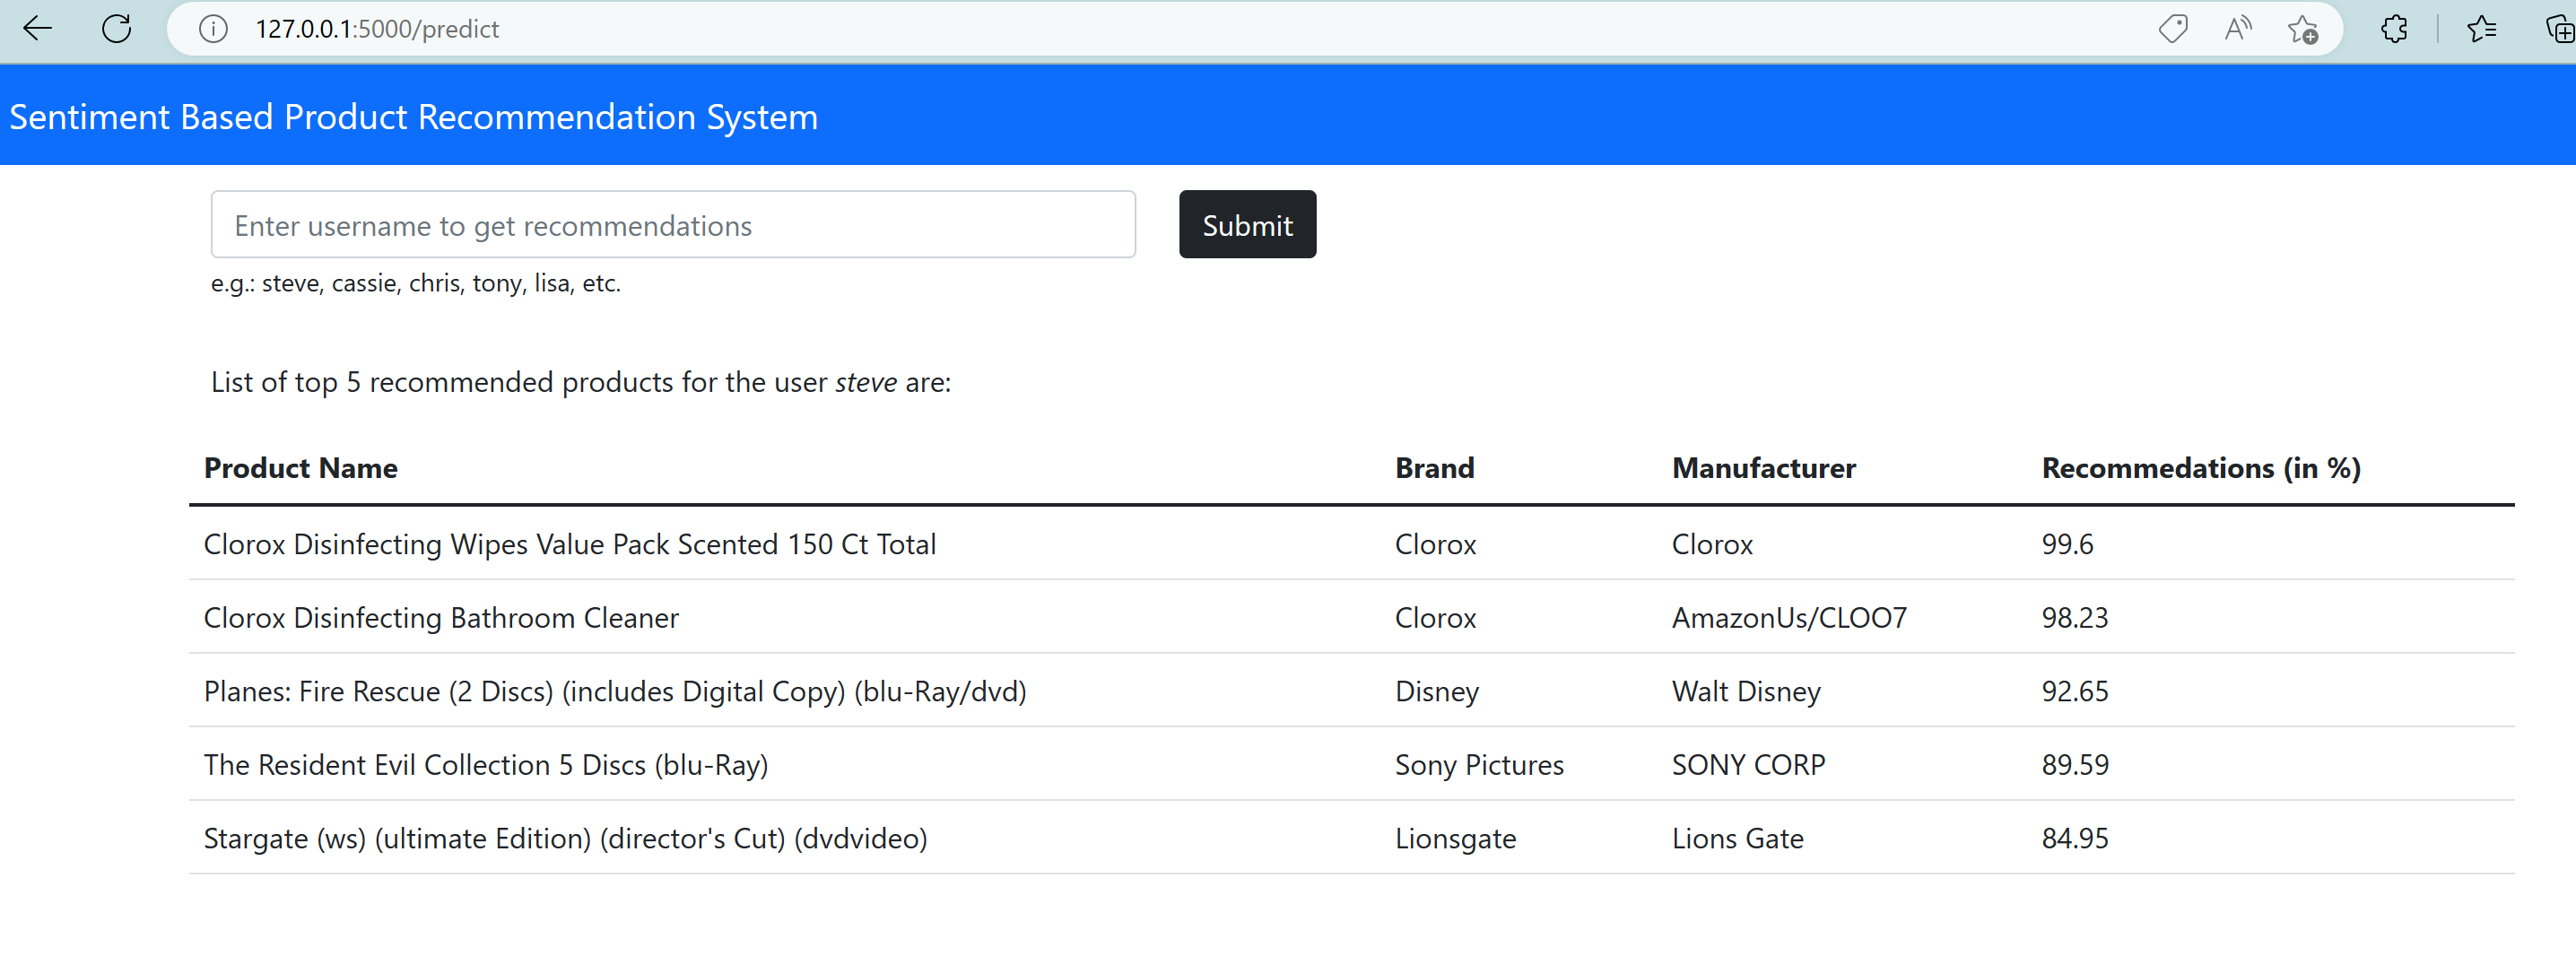